In [1]:
from matplotlib import pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm
import numpy as np

ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

fig = plt.figure()
ax = fig.add_subplot(221)

ax.bar(wd, ws)
#ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

#ax.legend(bbox_to_anchor=(1.02, 0))
#plt.show()

<BarContainer object of 500 artists>

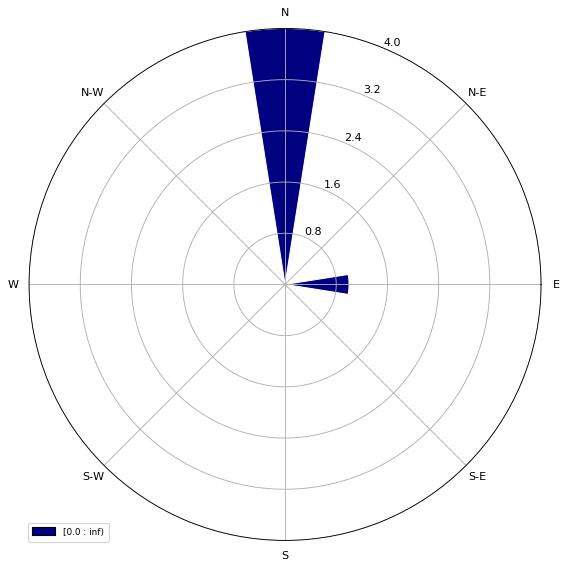

In [2]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
# Create wind speed and direction variables
#ws = np.random.random(500) * 30
#wd = np.random.random(500) * 360
ws = [15,15,   5, 5,20]
wd = [0 , 1, 359,90,348.75]

ax = WindroseAxes.from_ax()
#ax.bar(wd, ws, bins = [0,15,20,25], normed=False, opening=0.8, edgecolor='white')
ax.bar(wd, ws, bins=[0], normed=False, opening=0.8, edgecolor='white')
ax.set_legend()


In [3]:
ax._info['dir'], ax._info['bins'], ax._info['table']

([348.75,
  11.25,
  33.75,
  56.25,
  78.75,
  101.25,
  123.75,
  146.25,
  168.75,
  191.25,
  213.75,
  236.25,
  258.75,
  281.25,
  303.75,
  326.25],
 [0, inf],
 array([[4., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

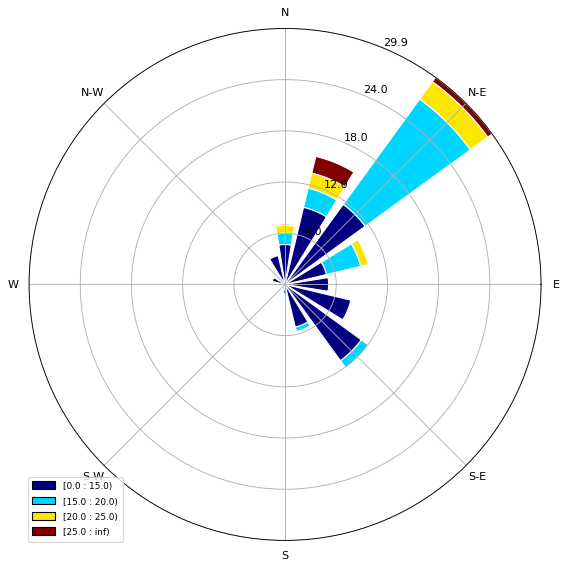

In [4]:
import pandas as pd

dayligthWindPD = pd.read_csv("dayligthWindPD-2012-12.csv")

#dayligthWindPD.dtypes

ax = WindroseAxes.from_ax()
#ax.bar(wd, ws, bins = [0,15,20,25], normed=False, opening=0.8, edgecolor='white')
#ax.bar(dayligthWindPD['WindDirectionDegrees'], dayligthWindPD['WindSpeedMPH'], bins=[0], normed=False, opening=0.8, edgecolor='white')
ax.bar(dayligthWindPD['WindDirectionDegrees'], dayligthWindPD['WindSpeedMPH'], bins=[0,15,20,25], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [5]:
ax._info['dir'], ax._info['bins'], ax._info['table']

([348.75,
  11.25,
  33.75,
  56.25,
  78.75,
  101.25,
  123.75,
  146.25,
  168.75,
  191.25,
  213.75,
  236.25,
  258.75,
  281.25,
  303.75,
  326.25],
 [0, 15, 20, 25, inf],
 array([[ 4.66257669,  9.26380368, 11.56441718,  4.96932515,  5.09202454,
          7.91411043, 11.01226994,  5.12269939,  1.07361963,  0.21472393,
          0.        ,  0.        ,  0.        ,  1.53374233,  0.15337423,
          3.46625767],
        [ 1.3190184 ,  2.3006135 , 15.21472393,  4.11042945,  0.03067485,
          0.09202454,  1.01226994,  0.52147239,  0.21472393,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.12269939],
        [ 0.9202454 ,  1.80981595,  2.51533742,  0.9202454 ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.15337423,  2.02453988,  0.64417178,  0.03067485,  0.        ,
          0

In [6]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

dayligthWindSchema = StructType([
    StructField("Date",StringType(),False),
    StructField("TS",StringType(),False),
    StructField("TSEpochSec",LongType(),False),
    StructField("WindSpeedMPH",DoubleType(),False),
    StructField("WindDirectionDegrees",DoubleType(),False)
])

# Changing the default timezone for the analysis
spark.conf.set("spark.sql.session.timeZone", "America/Merida")

# Inferr schema creates a problem when changing the session timezone
#    .option("inferSchema","true") \
    
staticDataFrame = spark.read \
    .format("csv") \
    .option("header","true") \
    .schema(dayligthWindSchema) \
    .load("dayligthWindPD.csv")
#    .load("dayligthWindPD.csv")


#staticDataFrame.show()
#staticDataFrame.printSchema()

dayligthWindDF = staticDataFrame \
    .withColumn("Date",col("Date").cast("date")) \
    .withColumn("TS",col("TS").cast("timestamp"))

#dayligthWindPD = staticDataFrame.selectExpr(
#    "cast(Date as date)",
#    "cast(TS as timestamp)",
#    "cast(TSEpochSec as long)",
#    "cast(WindSpeedMPH as double)",
#    "cast(WindDirectionDegrees as double)"
#)

dayligthWindDF.show()
dayligthWindDF.printSchema()


dayligthWindDF.createOrReplaceTempView("dayligthWindTable")

#root
# |-- Date: date (nullable = true)
# |-- TS: timestamp (nullable = true)
# |-- TSEpochSec: long (nullable = true)
# |-- WindSpeedMPH: double (nullable = true)
# |-- WindDirectionDegrees: double (nullable = true)

+----------+-------------------+----------+------------+--------------------+
|      Date|                 TS|TSEpochSec|WindSpeedMPH|WindDirectionDegrees|
+----------+-------------------+----------+------------+--------------------+
|2012-10-06|2012-10-06 06:50:00|1349524200|         0.0|               149.0|
|2012-10-06|2012-10-06 06:55:00|1349524500|         1.0|               150.0|
|2012-10-06|2012-10-06 07:00:00|1349524800|         1.0|               150.0|
|2012-10-06|2012-10-06 07:05:00|1349525100|         1.0|               150.0|
|2012-10-06|2012-10-06 07:10:00|1349525400|         0.5|               150.0|
|2012-10-06|2012-10-06 07:15:00|1349525700|         0.0|               150.0|
|2012-10-06|2012-10-06 07:20:00|1349526000|         0.0|               149.5|
|2012-10-06|2012-10-06 07:25:00|1349526300|         0.0|               149.0|
|2012-10-06|2012-10-06 07:30:00|1349526600|         0.0|               149.0|
|2012-10-06|2012-10-06 07:35:00|1349526900|         2.0|        

In [7]:
spark.sql("""
SELECT WindDirectionGroup, COUNT(1) as WindCount
FROM (
SELECT *, (CAST((WindDirectionDegrees+11.25)/22.5 AS INT) ) % 16 as WindDirectionGroup
FROM dayligthWindTable
)
GROUP BY WindDirectionGroup
ORDER BY WindDirectionGroup
""").show(100)
          
#FROM (SELECT DISTINCT WindDirectionDegrees FROM dayligthWindTable)

# No ranges golden:
# array([[230., 502., 976., 327., 167., 261., 392., 184.,  42.,   7.,   0.,
#           0.,   0.,  50.,   5., 117.]]))

+------------------+---------+
|WindDirectionGroup|WindCount|
+------------------+---------+
|                 0|    13332|
|                 1|    30861|
|                 2|    62453|
|                 3|    39610|
|                 4|    16975|
|                 5|    24675|
|                 6|    27220|
|                 7|    13340|
|                 8|     4717|
|                 9|     2418|
|                10|      866|
|                11|      378|
|                12|      940|
|                13|     2112|
|                14|     3188|
|                15|     5850|
+------------------+---------+



In [8]:
#    (CAST((WindDirectionDegrees+11.25)/22.5 AS INT) ) % 16 AS WindDirectionGroup,
windRoseDF = spark.sql("""
SELECT *
FROM (
  SELECT
    month(Date) as Month,
    (CAST(((WindDirectionDegrees*16)/360) + 0.5 AS INT) ) % 16 AS WindDirectionGroup,
    CASE
      WHEN WindSpeedMPH < 15 THEN '0 to 15'
      WHEN WindSpeedMPH < 20 THEN '15 to 20'
      WHEN WindSpeedMPH < 25 THEN '20 to 25'
      ELSE '25 or over'
    END AS WindSpeedGroup
  FROM dayligthWindTable
)
PIVOT (
  COUNT(1)
  FOR WindSpeedGroup IN ('0 to 15', '15 to 20', '20 to 25', '25 or over')
)
ORDER BY Month DESC, WindDirectionGroup

""")

windRoseDF.show(1000)

#windRoseDF.createOrReplaceTempView("windRoseTable")

# array([[152., 302., 377., 162., 166., 258., 359., 167.,  35.,   7.,   0.,
#           0.,   0.,  50.,   5., 113.],
#        [ 43.,  75., 496., 134.,   1.,   3.,  33.,  17.,   7.,   0.,   0.,
#           0.,   0.,   0.,   0.,   4.],
#        [ 30.,  59.,  82.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#           0.,   0.,   0.,   0.,   0.],
#        [  5.,  66.,  21.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#           0.,   0.,   0.,   0.,   0.]]))

+-----+------------------+-------+--------+--------+----------+
|Month|WindDirectionGroup|0 to 15|15 to 20|20 to 25|25 or over|
+-----+------------------+-------+--------+--------+----------+
|   12|                 0|    671|     140|      81|        82|
|   12|                 1|   1741|     769|     371|       194|
|   12|                 2|   3041|    1746|     502|       109|
|   12|                 3|   2087|     557|      57|         1|
|   12|                 4|   1113|       5|       1|      null|
|   12|                 5|   1744|      30|       5|      null|
|   12|                 6|   2259|     220|      17|      null|
|   12|                 7|    854|     147|       5|      null|
|   12|                 8|    211|      24|       1|      null|
|   12|                 9|     79|    null|    null|      null|
|   12|                10|     21|    null|    null|      null|
|   12|                11|      5|    null|    null|      null|
|   12|                12|      5|    nu

In [9]:
#totalByMonthDF = spark.sql("""
#SELECT month(Date) AS MGroup, COUNT(1) as Total
#FROM dayligthWindTable
#GROUP BY month(Date)
#""")

#totalByMonthDF.show()

#totalByMonthDF.createOrReplaceTempView("totalByMonthTable")



spark.sql("""
SELECT *
FROM (
  SELECT
    month(Date) as Month,
    (CAST(((WindDirectionDegrees*16)/360) + 0.5 AS INT) ) % 16 AS WindDirectionGroup,
    CASE
      WHEN WindSpeedMPH < 15 THEN 'r_0_15'
      WHEN WindSpeedMPH < 20 THEN 'r_15_20'
      WHEN WindSpeedMPH < 25 THEN 'r_20_25'
      ELSE 'r_25_inf'
    END AS WindSpeedGroup
  FROM dayligthWindTable
)
PIVOT (
  COUNT(1)
  FOR WindSpeedGroup IN ('r_0_15', 'r_15_20', 'r_20_25', 'r_25_inf')
)
""").createOrReplaceTempView("windRoseTable")

#SELECT Month, WindDirectionGroup, `0 to 15`/Total AS r1 , `15 to 20`/Total AS r2 , `20 to 25`/Total AS r3, ifnull(`25 or over`,0)/Total AS r4
#   ORDER BY Month DESC, WindDirectionGroup

normedWindRoseDF = spark.sql("""
SELECT
  Month,
  WindDirectionGroup,
  IFNULL(r_0_15,0)/Total AS `0 to 15`,
  IFNULL(r_15_20,0)/Total AS `15 to 20`,
  IFNULL(r_20_25,0)/Total AS `20 to 25`,
  IFNULL(r_25_inf,0)/Total AS `25 or over`
FROM
  windRoseTable
JOIN (
  SELECT month(Date) AS MGroup, COUNT(1) as Total
  FROM dayligthWindTable
  GROUP BY month(Date)
) AS totalByMonthTable
ON windRoseTable.Month = totalByMonthTable.MGroup
ORDER BY Month DESC, WindDirectionGroup
""")

normedWindRoseDF.show()
spark.catalog.dropTempView("windRoseTable")
spark.catalog.dropTempView("dayligthWindTable")

#spark.sql("select * from windRoseTable").show()
# array([[ 4.66257669,  9.26380368, 11.56441718,  4.96932515,  5.09202454,
#          7.91411043, 11.01226994,  5.12269939,  1.07361963,  0.21472393,
#          0.        ,  0.        ,  0.        ,  1.53374233,  0.15337423,
#          3.46625767],
#        [ 1.3190184 ,  2.3006135 , 15.21472393,  4.11042945,  0.03067485,
#          0.09202454,  1.01226994,  0.52147239,  0.21472393,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#          0.12269939],
#        [ 0.9202454 ,  1.80981595,  2.51533742,  0.9202454 ,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#          0.        ],
#        [ 0.15337423,  2.02453988,  0.64417178,  0.03067485,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#          0.        ]]))

+-----+------------------+--------------------+--------------------+--------------------+--------------------+
|Month|WindDirectionGroup|             0 to 15|            15 to 20|            20 to 25|          25 or over|
+-----+------------------+--------------------+--------------------+--------------------+--------------------+
|   12|                 0| 0.03486076475477972|0.007273482959268496|0.004208229426433915|0.004260182876142976|
|   12|                 1| 0.09045095594347465|0.039952202826267665| 0.01927472984206151|0.010078969243557773|
|   12|                 2| 0.15799044056525352| 0.09071072319201995|0.026080631753948463|0.005662926018287614|
|   12|                 3| 0.10842684954280964|  0.0289380714879468|0.002961346633416...|5.195344970906068E-5|
|   12|                 4| 0.05782418952618454|2.597672485453034E-4|5.195344970906068E-5|                 0.0|
|   12|                 5| 0.09060681629260182|0.001558603491271...|2.597672485453034E-4|                 0.0|
|

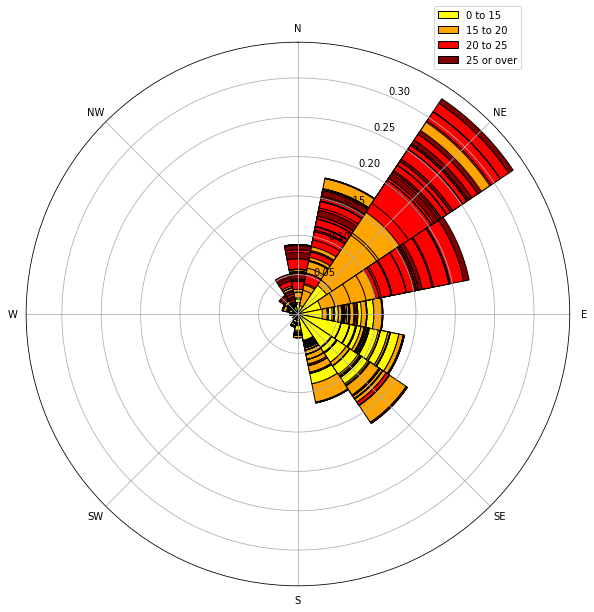

In [10]:
# Bring back to python:
import math

normedWindRosePD = normedWindRoseDF.toPandas()

#normedWindRosePD

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_direction('clockwise')
ax.set_theta_zero_location('N')

"""
ax.bar(2*(math.pi)*1/16, 2, 
  width=2*(math.pi)/16, #Radians
  color='maroon',
  edgecolor='none',
  label='M',
  linewidth=0)

ax.bar(2*(math.pi)*0/16, 2, 
  width=2*(math.pi)/16, #Radians
  color='red',
  edgecolor='none',
  label='R',
  linewidth=0)

ax.bar(2*(math.pi)*2/16, 1, 
  width=2*(math.pi)/16, #Radians
  color='yellow',
  edgecolor='none',
  label='Y',
  linewidth=0)

ax.bar(2*(math.pi)*2/16, 1, 
  width=2*(math.pi)/16, #Radians
  color='yellow',
  edgecolor='none',
  label='Y',
  linewidth=0)

ax.bar(2*(math.pi)*2/16, 0.5, 
  width=2*(math.pi)/16, #Radians
  bottom=1,
  color='Orange',
  edgecolor='none',
  label='O',
  linewidth=0)

ax.bar(2*(math.pi)*2/16, 0.5, 
  width=2*(math.pi)/16, #Radians
  bottom=1.5,
  color='Red',
  edgecolor='none',
  label='R',
  linewidth=0)

ax.bar(2*(math.pi)*2/16, 0.25, 
  width=2*(math.pi)/16, #Radians
  bottom=2.5,
  color='Maroon',
  edgecolor='Black',
  label='M',
  linewidth=1)

"""


ax.bar(
  2*(math.pi)*normedWindRosePD['WindDirectionGroup']/16,
  normedWindRosePD['0 to 15'], 
  width=2*(math.pi)/16, #Radians
  bottom=0,
  color='Yellow',
  edgecolor='Black',
  label='0 to 15',
  linewidth=1)

ax.bar(
  2*(math.pi)*normedWindRosePD['WindDirectionGroup']/16,
  normedWindRosePD['15 to 20'], 
  width=2*(math.pi)/16, #Radians
  bottom=normedWindRosePD['0 to 15'],
  color='Orange',
  edgecolor='Black',
  label='15 to 20',
  linewidth=1)

ax.bar(
  2*(math.pi)*normedWindRosePD['WindDirectionGroup']/16,
  normedWindRosePD['20 to 25'], 
  width=2*(math.pi)/16, #Radians
  bottom=normedWindRosePD[['0 to 15','15 to 20']].sum(axis=1),
  color='Red',
  edgecolor='Black',
  label='20 to 25',
  linewidth=1)

ax.bar(
  2*(math.pi)*normedWindRosePD['WindDirectionGroup']/16,
  normedWindRosePD['25 or over'], 
  width=2*(math.pi)/16, #Radians
  bottom=normedWindRosePD[['0 to 15','15 to 20','20 to 25']].sum(axis=1),
  color='Maroon',
  edgecolor='Black',
  label='25 or over',
  linewidth=1)

leg = ax.legend(loc=(0.75, 0.95))
xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
#   bottom=rosedata.cumsum(axis=1)[c1].values,


Element 0 , name : 0 to 15, color : Yellow
Element 1 , name : 15 to 20, color : Orange
Element 2 , name : 20 to 25, color : Red
Element 3 , name : 25 or over, color : Maroon


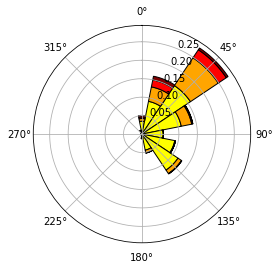

In [11]:
#normedWindRosePD[['0 to 15','15 to 20']].sum(axis=1)



 
#arr = ['0 to 15','15 to 20','20 to 25','25 or over']
#normedWindRosePD[arr[0:3]]
#arr[0:0]
#normedWindRosePD[arr[0:1]].sum(axis=1)

#fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig, ax = plt.subplots( subplot_kw=dict(polar=True))
ax.set_theta_direction('clockwise')
ax.set_theta_zero_location('N')

ranges = [
    ('0 to 15','Yellow'),
    ('15 to 20','Orange'),
    ('20 to 25','Red'),
    ('25 or over','Maroon')
]

normedWindRoseGroupsPD = normedWindRosePD.groupby('Month')

normedWindRoseGroupPD = normedWindRoseGroupsPD.get_group(12)

for i, (name,color) in enumerate(ranges) :
    print(f"Element {i} , name : {name}, color : {color}")

    ax.bar(
        2*(math.pi)*normedWindRoseGroupPD['WindDirectionGroup']/16,
        normedWindRoseGroupPD[name],
        width=2*(math.pi)/16, #Radians
        bottom= 0 if i == 0 else normedWindRoseGroupPD[list(map(lambda x : x[0],ranges[0:i]))].sum(axis=1),
        color=color,
        edgecolor='Black',
        label=name,
        linewidth=1)




In [12]:
#list(map(lambda x : x[0], ranges[0:2]))

#ranges[0:2]

gb = normedWindRosePD.groupby('Month')

#gb.groups
x = gb.get_group(1)
#normedWindRosePD

x['0 to 15']
#normedWindRoseGroupPD['WindDirectionGroup'].shape
#normedWindRosePD['WindDirectionGroup'].shape

176    0.056380
177    0.077723
178    0.123707
179    0.088269
180    0.062128
181    0.074624
182    0.073824
183    0.039486
184    0.025691
185    0.012146
186    0.003899
187    0.001250
188    0.004698
189    0.010996
190    0.016894
191    0.030039
Name: 0 to 15, dtype: float64

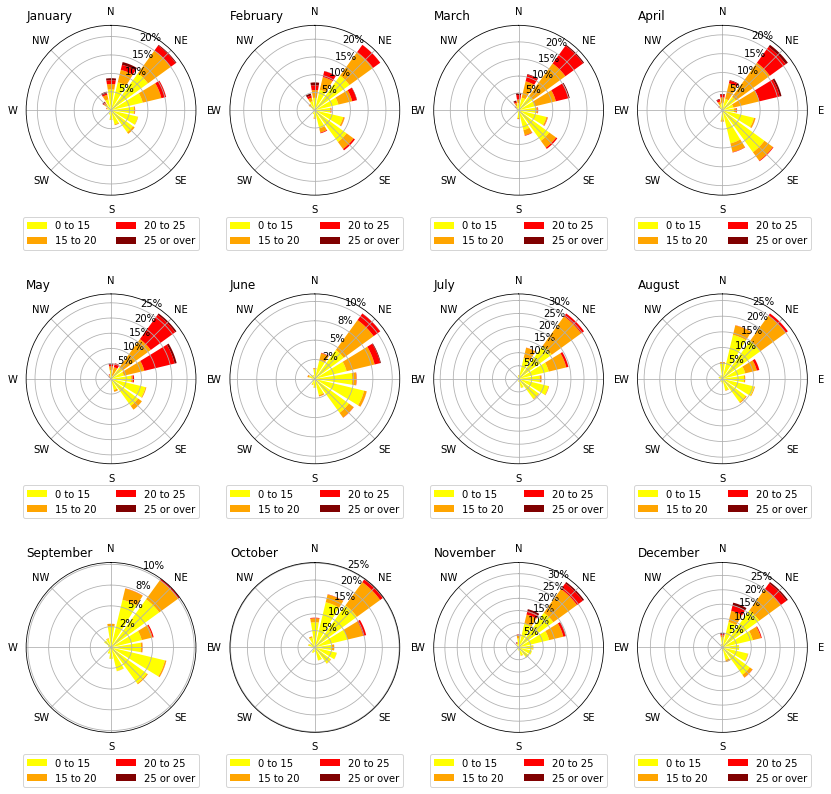

In [13]:
import calendar

def plotWindRose(windRosePD, ranges) :
    windRoseGroupsPD = windRosePD.groupby('Month')
    fig, axes = plt.subplots(3,4, figsize=(14, 14), subplot_kw=dict(polar=True))
    for rown, axrow in enumerate(axes) :
        for coln, ax in enumerate(axrow):
            monthNum = rown*len(axrow)+coln+1
            ax.set_theta_zero_location('N')
            ax.set_theta_direction('clockwise')
            ax.set_title(calendar.month_name[monthNum],loc='left')
            ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
            try:
                windRoseGroupPD = windRoseGroupsPD.get_group(monthNum)
                for i, (name,color) in enumerate(ranges) :
                    ax.bar(
                        2*(math.pi)*windRoseGroupPD['WindDirectionGroup']/16,
                        windRoseGroupPD[name],
                        width=0.80*2*(math.pi)/16, #Radians
                        bottom= 0 if i == 0 else windRoseGroupPD[list(map(lambda x : x[0],ranges[0:i]))].sum(axis=1),
                        color=color,
                        #edgecolor='None',
                        label=name,
                        linewidth=0)
                    ax.legend(loc='lower center',ncol=2, bbox_to_anchor=(0.5, -0.35))
                ax.set_yticklabels(map(lambda x : "{:.0%}".format(x),ax.get_yticks()), fontdict=None, minor=False)
            except KeyError as keyErr:
                print('WARNING: No entries for month',keyErr)
    return (fig, axes)

rangesSpec = [
    ('0 to 15','Yellow'),
    ('15 to 20','Orange'),
    ('20 to 25','Red'),
    ('25 or over','Maroon')
]
fig, axes = plotWindRose(normedWindRosePD,rangesSpec)


In [14]:
#spark.sql("""
#SELECT DISTINCT YEAR(Date) FROM dayligthWindTable
#""").show()

dayligthWindDF.select(year(col("Date"))).distinct().show()


+----------+
|year(Date)|
+----------+
|      2015|
|      2013|
|      2014|
|      2012|
|      2016|
+----------+

